In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [2]:
def process_buoy(url):
    df = pd.read_csv(url, delim_whitespace=True)
    df = df.drop(0)
    selected_columns = ["#YY", "MM", "DD", "hh", "mm", "ATMP","DEWP","WDIR", "WSPD", "GST","PRES"]
    df = df[selected_columns]
    df['date'] = df['#YY'].astype(str) + '-' + df['MM'].astype(str) + '-' + df['DD'].astype(str) + ' ' + df['hh'].astype(str) + ':' + df['mm'].astype(str)
    df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M')
    df = df.loc[(df['date'] >= '2019-07-20 01:00:00') & (df['date'] < '2019-07-20 06:05:00')]
    df['ATMP'] = ((pd.to_numeric(df['ATMP'], errors='coerce')*1)+273.15)
    df['DEWP'] = ((pd.to_numeric(df['DEWP'], errors='coerce')*1)+273.15)
    df['WSPD'] = pd.to_numeric(df['WSPD'], errors='coerce')
    df['WDIR'] = pd.to_numeric(df['WDIR'], errors='coerce')
    df['PRES'] = pd.to_numeric(df['PRES'], errors='coerce')

    return df

def process_asos(url):
    df = pd.read_csv(url)
    columns_to_keep = ['valid', 'station', 'lon', 'lat', 'tmpf', 'dwpf', 'drct', 'sknt','mslp']
    df = df[columns_to_keep]
    df = df.dropna(subset=['tmpf'])
    df.replace('M', np.nan, inplace=True)
    df = df.dropna(subset=['tmpf', 'dwpf'])
    df['ATMP'] = pd.to_numeric(df['tmpf']+273.15, errors='coerce')
    df['DEWP'] = pd.to_numeric(df['dwpf']+273.15, errors='coerce')
    df['WSPD'] = pd.to_numeric(df['sknt'], errors='coerce')
    df['drct'] = pd.to_numeric(df['drct'], errors='coerce')
    df['PRES'] = pd.to_numeric(df['mslp'], errors='coerce')
    df['date'] = pd.to_datetime(df['valid'], format='%Y-%m-%d %H:%M')
    df = df.loc[(df['date'] >= '2019-07-20 01:00:00') & (df['date'] < '2019-07-20 06:00:00')]

    return df

def plot_data(df_list):
    fig, axs = plt.subplots(3, len(df_list), figsize=(6 * len(df_list), 6))

    for i, df in enumerate(df_list):
        col = i

        axs[0, col].plot(df['date'], df['ATMP'], c='red', label='Air Temperature')
        axs[0, col].plot(df['date'], df['DEWP'], c='green', label='Dewpoint Temperature')
        axs[0, col].set_xlim([df['date'].iloc[0], df['date'].iloc[-1]])
        axs[0, col].set_ylim([285, 305])
        axs[0, col].set_yticks(np.arange(285, 306, 5))
        axs[0, col].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[0, col].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[0, 0].set_ylabel('Temperature (K)')
        axs[0, col].yaxis.grid()

        axs[1, col].plot(df['date'], df['PRES']-df['PRES'].mean(), c='black', label='Pressure')
        axs[1, col].set_ylim([-6, 6])
        axs[1, col].set_yticks(np.arange(-6, 7, 2))
        axs[1, col].set_xlim([df['date'].iloc[0], df['date'].iloc[-1]])
        axs[1, col].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[1, col].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[1, 0].set_ylabel('Pressure Difference (hPa)')
        axs[1, col].yaxis.grid()

        axs[2, col].plot(df['date'], df['WSPD'], c='blue', label='Wind Speed')
        axs[2, col].set_ylim([0, 25])
        axs[2, col].set_yticks(np.arange(0, 26, 5))
        axs[2, col].set_xlim([df['date'].iloc[0], df['date'].iloc[-1]])
        axs[2, col].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[2, col].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[2, col].set_xlabel('Time (UTC)')
        axs[2, 0].set_ylabel('Wind Speed (m/s)')
        axs[2, col].yaxis.grid(zorder=1)


        axs[0, 0].axvline(pd.Timestamp('02:35').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)
        axs[1, 0].axvline(pd.Timestamp('02:35').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)
        axs[2, 0].axvline(pd.Timestamp('02:35').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)

        axs[0, 1].axvline(pd.Timestamp('04:30').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)
        axs[1, 1].axvline(pd.Timestamp('04:30').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)
        axs[2, 1].axvline(pd.Timestamp('04:30').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)

        axs[0, 2].axvline(pd.Timestamp('04:00').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)
        axs[1, 2].axvline(pd.Timestamp('04:00').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)
        axs[2, 2].axvline(pd.Timestamp('04:00').replace(year=df['date'].iloc[0].year, month=df['date'].iloc[0].month, day=df['date'].iloc[0].day), color = 'gray', label = '', zorder=2)

        axs[0, 0].set_title('Station MNMM4 (Menominee, MI)')
        axs[0, 1].set_title('Station 45002 (Northern Lake Michigan)') 
        axs[0, 2].set_title('Station 45183 (Sleeping Bear Dunes, MI)')
        fig.align_ylabels(axs) 

    plt.suptitle('Buoy Meteograms for {}'.format(df['date'].iloc[0].strftime('%Y-%m-%d')), fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_data_asos(df_list):
    fig, axs = plt.subplots(3, len(df_list), figsize=(6 * len(df_list), 6))

    for i, df in enumerate(df_list):
        col = i

        axs[0, col].plot(df['date'], df['ATMP'], c='red', label='Air Temperature')
        axs[0, col].plot(df['date'], df['DEWP'], c='green', label='Dewpoint Temperature')
        axs[0, col].set_xlim([df['date'].iloc[0], df['date'].iloc[-1]])
        axs[0, col].set_ylim([285, 305])
        axs[0, col].set_yticks(np.arange(285, 306, 5))
        axs[0, col].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[0, col].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[0, 0].set_ylabel('Temperature (K)')
        axs[0, col].yaxis.grid()

        axs[1, col].plot(df['date'], df['PRES']-df['PRES'].mean(), c='black', label='Pressure')
        axs[1, col].set_ylim([-6, 6])
        axs[1, col].set_yticks(np.arange(-6, 7, 2))
        axs[1, col].set_xlim([df['date'].iloc[0], df['date'].iloc[-1]])
        axs[1, col].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[1, col].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[1, 0].set_ylabel('Pressure Difference (hPa)')
        axs[1, col].yaxis.grid()

        axs[2, col].plot(df['date'], df['WSPD'], c='blue', label='Wind Speed')
        axs[2, col].set_ylim([0, 25])
        axs[2, col].set_yticks(np.arange(0, 26, 5))
        axs[2, col].set_xlim([df['date'].iloc[0], df['date'].iloc[-1]])
        axs[2, col].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
        axs[2, col].xaxis.set_major_locator(mdates.AutoDateLocator())
        axs[2, col].set_xlabel('Time (UTC)')
        axs[2, 0].set_ylabel('Wind Speed (m/s)')
        axs[2, col].yaxis.grid(zorder=1)

        axs[0, 0].set_title('Station MNMM4 (Menominee, MI)')
        axs[0, 1].set_title('Station 45002 (Northern Lake Michigan)') 
        axs[0, 2].set_title('Station 45183 (Sleeping Bear Dunes, MI)')
        fig.align_ylabels(axs) 

    plt.suptitle('ASOS Meteograms for {}'.format(df['date'].iloc[0].strftime('%Y-%m-%d')), fontsize=14)
    plt.tight_layout()
    plt.show()

C:\Users\tonyi\AppData\Local\Temp\ipykernel_6648\331717480.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, delim_whitespace=True)


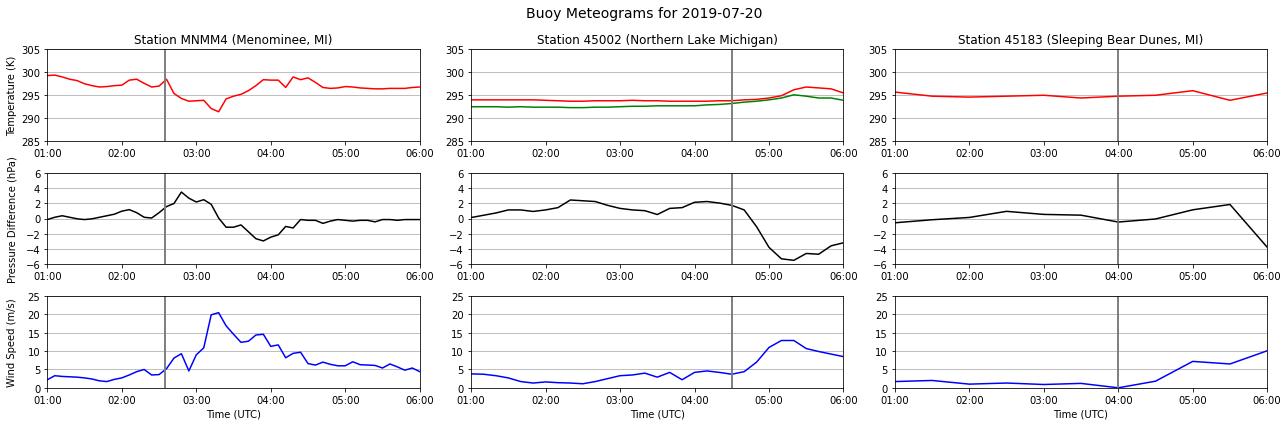

In [3]:
plot_data([process_buoy('https://www.ndbc.noaa.gov/view_text_file.php?filename=mnmm4h2019.txt.gz&dir=data/historical/stdmet/'), process_buoy('https://www.ndbc.noaa.gov/view_text_file.php?filename=45002h2019.txt.gz&dir=data/historical/stdmet/'), process_buoy('https://www.ndbc.noaa.gov/view_text_file.php?filename=45183h2019.txt.gz&dir=data/historical/stdmet/')])

In [ ]:
plot_data_asos()